## Task3
### 1. Design a line plot and scatter plot between 20 random values and its square root in a single plane

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
x=np.linspace(1,60,20,dtype="int")
x

array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 32, 35, 38, 41, 44, 47, 50,
       53, 56, 60])

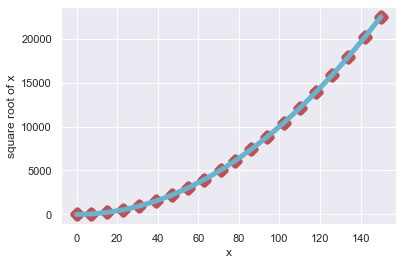

In [12]:
plt.plot(x,x**2,c='c',linewidth=5)
plt.scatter(x,x**2,c='r',marker='D',linewidth=6)
plt.xlabel("x")
plt.ylabel("square root of x")
plt.show()

### 2. Draw a scatter plot of 20 equally separated values from 0 - 150 and and its cosine values with different colors

In [5]:
x=np.linspace(0,150,20,dtype="int")
x

array([  0,   7,  15,  23,  31,  39,  47,  55,  63,  71,  78,  86,  94,
       102, 110, 118, 126, 134, 142, 150])

In [6]:
l=sns.hls_palette(n_colors = 20,l = .4, s = 0.9 )


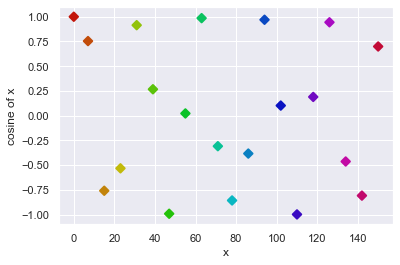

In [7]:
plt.scatter(x,np.cos(x),c=l,marker='D',linewidth=2)
plt.xlabel("x")
plt.ylabel("cosine of x")
plt.show()

### 3. Draw a bar graph between "type" label (in birds.csv file) invertical axis and its frequency count in horizontal axis and give a proper labels and title

In [13]:
import pandas as pd
birds=pd.read_csv('birds.csv')
birds.head()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


In [14]:
birds['type'].value_counts()

SO    128
SW    116
W      65
R      50
P      38
T      23
Name: type, dtype: int64

In [17]:
l=list(birds['type'].value_counts())
u=list(birds['type'].unique())
c=['c','b','r','y','g','m']
l,u

([128, 116, 65, 50, 38, 23], ['SW', 'W', 'T', 'R', 'P', 'SO'])

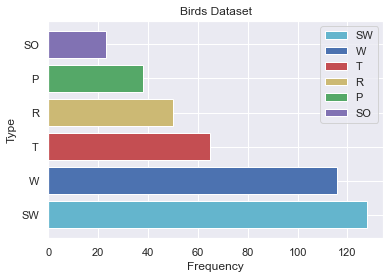

In [23]:
for i in range(len(l)):
    plt.barh(u[i],l[i],color=c[i],label=u[i])
plt.legend()
plt.ylabel("Type")
plt.xlabel("Frequency")
plt.title("Birds Dataset")
plt.show()

### 4. Take any 7 state literacy rate and show it on the pie chart , give the correct labels and percentage

In [24]:
d={'Kerala':94.0,'Mizoram':91.3,"Goa":88.7,"Tripura":87.2,"Delhi":86.2,"Chandigarh":86.0,"Himachal pradesh":82.8}
s=list(d.keys())
v=list(d.values())


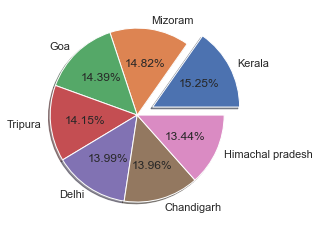

In [25]:
plt.pie(v,labels=s,pctdistance=0.6,explode=[0.2,0,0,0,0,0,0],shadow=True,autopct='%1.2f%%')
plt.show()

### 5. Take any dataset having outliers from kaggle and apply preprocessing technique and visualize in box plot

In [30]:
titanic=pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


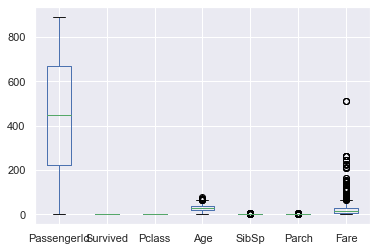

<Figure size 1440x720 with 0 Axes>

In [35]:
%matplotlib inline
titanic.plot(kind='box')
plt.figure(figsize=(20,10))
plt.show()

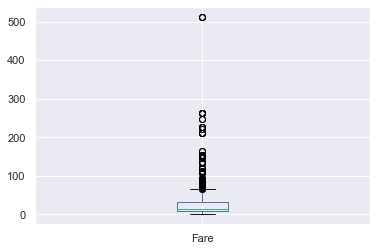

In [36]:
titanic['Fare'].plot(kind='box')
plt.show()

In [37]:
from sklearn.preprocessing import RobustScaler

In [38]:
rs=RobustScaler()

In [42]:
rs_data=rs.fit_transform(titanic[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare']])

In [43]:
df=pd.DataFrame(rs_data,columns=['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare'])
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,-1.000000,0.0,0.0,-0.335664,1.0,0.0,-0.312011
1,-0.997753,1.0,-2.0,0.559441,1.0,0.0,2.461242
2,-0.995506,1.0,0.0,-0.111888,0.0,0.0,-0.282777
3,-0.993258,1.0,-2.0,0.391608,1.0,0.0,1.673732
4,-0.991011,0.0,0.0,0.391608,0.0,0.0,-0.277363


<AxesSubplot:>

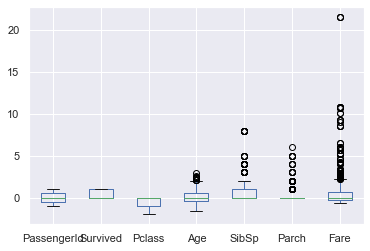

In [44]:
df.plot(kind='box')

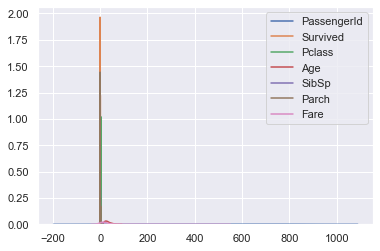

In [47]:
#Before preprocessing
for i in df.columns:
    sns.kdeplot(titanic[i])

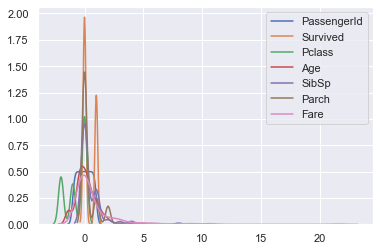

In [48]:
#After Preprocessing
for i in df.columns:
    sns.kdeplot(df[i])